In [1]:
%matplotlib inline
import matplotlib as plt
import pandas as pd
import numpy as np

In [30]:
data = pd.read_csv('~/tmp/avalanches100x100-100k.csv', index_col='time')

data.describe()

,slide size
count,37229.000000
mean,773.905289
std,2394.464894
min,1.000000
25%,3.000000
50%,28.000000
75%,328.000000
max,45954.000000


In [31]:
data.columns

Index(['slide size'], dtype='object')

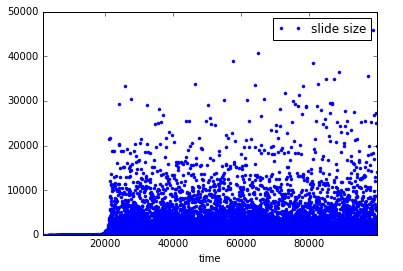

In [32]:
data.plot(style='.')

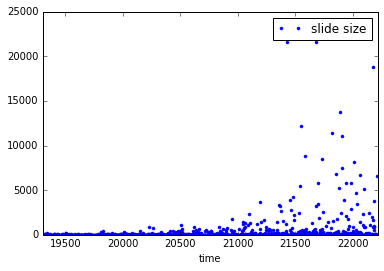

In [33]:
data[2000:3200].plot(style='.')

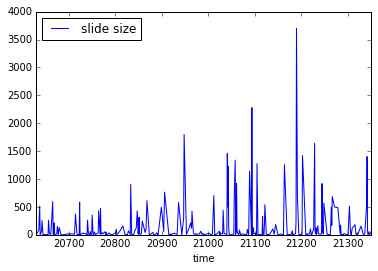

In [34]:
data[2500:2800].plot(style='-')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b60fac8>]], dtype=object)

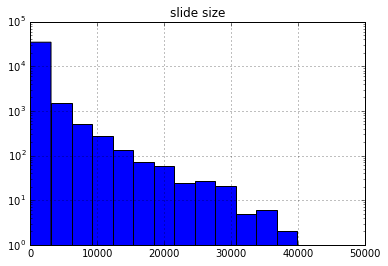

In [35]:
data.hist(bins=15, log=True)

# Questions

- How sensitive is the sandpile to having so many grains of sand already 'in play' by a limiting the pool of grains to a fixed number? Will this demostrate some SOC paramaritized via the density of sand, which may be a proxy for energy.

- How big is the upper quartile of slides? If I'm reading the desc() output correctly, and my overall calculation on slide sizing is correct, then the largest slide is damn near 46K. This is amazing as the board size is 100x100 which is a total of 10,000 cells. This means that the longest slide impacts a cell count that is almost 4.5 times the number of cells in the lattice.

In [36]:
data.describe(percentiles=[.05, .25, .75, .95])

,slide size
count,37229.000000
mean,773.905289
std,2394.464894
min,1.000000
5%,1.000000
25%,3.000000
50%,28.000000
75%,328.000000
95%,4270.000000
max,45954.000000


In [41]:
data[data['slide size'] > 10000]

,slide size
time,
21431,21561
21549,12152
21678,21612
21819,11347
21893,13705
21905,11093
22176,18742
22220,10541
22446,10776


In [150]:
def logistic(x0, a):
    next_x = x0
    while True:
        next_x = next_x + a*next_x*(1.0-next_x)
        yield next_x

In [199]:
def mk_logistic(start_x, coeff):
    
    def logistic(x0=start_x, a=coeff):
        next_x = x0
        while True:
            next_x = next_x + a*next_x(1.0-next_x)
            yield next_x

    return logistic

In [214]:
f = mk_logistic(.35, 1.0)
print(take(10,f()))

TypeError: 'float' object is not callable

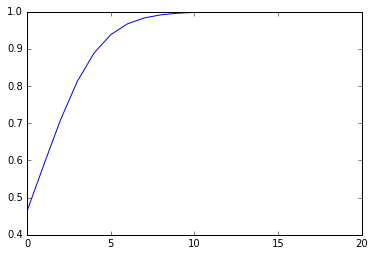

In [183]:
f = logistic(.35, 0.5)

plt.pyplot.plot(take(20, f))

In [156]:
def integers():
    """Infinite sequence of integers."""
    i = 1
    while True:
        yield i
        i = i + 1

def squares():
    for i in integers():
        yield i * i

def take(n, seq):
    """Returns first n values from the given sequence."""
    seq = iter(seq)
    result = []
    try:
        for i in range(n):
            result.append(seq.__next__())
    except StopIteration:
        pass
    return result

print(take(5, squares()))

[1, 4, 9, 16, 25]


In [115]:
def gen(x0, a):
    while True:
        next_x = x0 + a*x0*(1.0-x0)
        yield next_x
        x0 = next_x

In [116]:
f = gen(.35, 1.0)

In [117]:
for i in range(10):
    print(f.__next__())

0.5774999999999999
0.8214937499999999
0.9681355187109375
0.998984654832179
0.9999989690741902
0.9999999999989372
1.0
1.0
1.0
1.0
